In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

# CIFAR-10

In [17]:
# CIFAR-10
# senn20 = pd.read_csv("../src/outputs/2021-05-17/17-45-51/eval/edit_success_finetune_epoch4_ts9999.2021-05-17.17-45-51")
senn5 = pd.read_csv("../src/outputs/2021-05-21/16-09-26/eval/edit_success_resnet18_epoch20_ts4000.2021-05-21.16-09-26")
senn1 = pd.read_csv("../src/outputs/2021-05-21/14-30-20/eval/edit_success_finetune_epoch99_ts9999.2021-05-21.14-30-20")

ortho5 = pd.read_csv("../src/outputs/2021-05-22/08-36-49/eval/edit_success_resnet18_epoch69_ts13600.2021-05-22.08-36-49")
# ortho1_alt = pd.read_csv("../src/outputs/2021-05-22/08-37-07/eval/edit_success_finetune_epoch99_ts9999.2021-05-22.08-37-07")
ortho1 = pd.read_csv("../src/outputs/2021-05-21/22-31-15/eval/edit_success_finetune_epoch99_ts9999.2021-05-21.22-31-15")


# senn_adam = pd.read_csv("../src/outputs/2021-05-18/12-02-44/eval/edit_success_finetune_epoch19_ts9999.2021-05-18.12-02-44")
# senn_sgd = pd.read_csv("../src/outputs/2021-05-18/11-56-08/eval/edit_success_finetune_epoch19_ts9999.2021-05-18.11-56-08")
# senn_cos = pd.read_csv("../src/outputs/2021-05-18/11-54-12/eval/edit_success_finetune_epoch19_ts9999.2021-05-18.11-54-12")
enn = pd.read_csv("../src/outputs/2021-05-21/14-30-57/eval/edit_success_finetune_epoch49_ts9999.2021-05-21.14-30-57")
base = pd.read_csv("../eval/edit_success_20210509.13.05.1620592304_finetune_epoch199_ts9999.20210429.19.04.1619750982")


In [11]:
senn1_1 = pd.read_csv("../src/outputs/2021-05-21/14-30-20/eval/edit_success_finetune_epoch99_ts9999.2021-05-21.14-30-20")
senn1_2 = pd.read_csv("../src/outputs/2021-05-21/23-26-34/eval/edit_success_finetune_epoch99_ts9999.2021-05-21.23-26-34")
senn1_3 = pd.read_csv("../src/outputs/2021-05-22/11-38-38/eval/edit_success_finetune_epoch99_ts9999.2021-05-22.11-38-38")


## Edit success

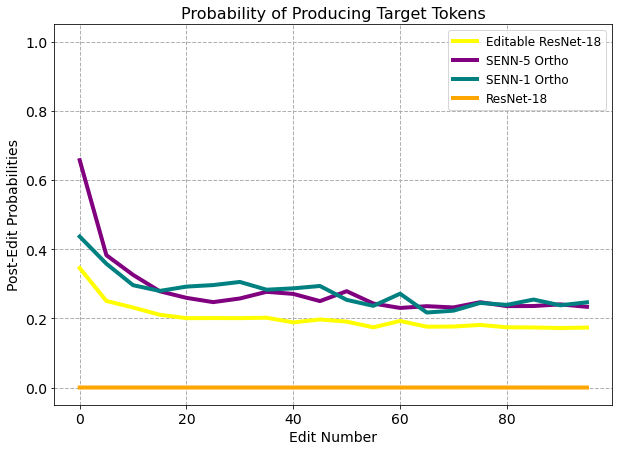

In [20]:

enn['grouping'] = (
    enn
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
ax = (
    enn
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="yellow",
        label="Editable ResNet-18"
    )
)

'''
senn20['grouping'] = (
    senn20
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn20
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index(drop=True)
    .plot(
        kind='line', x='grouping', y="log_prob", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN-20", ax=ax
    )
)

senn5['grouping'] = (
    senn5
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    senn5
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="black",
        label="SENN-5", ax=ax
    )
)

senn1['grouping'] = (
    senn1
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    senn1
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="green",
        label="SENN-1", ax=ax
    )
)
'''

ortho5['grouping'] = (
    ortho5
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    ortho5
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="purple",
        label="SENN-5 Ortho", ax=ax
    )
)

ortho1['grouping'] = (
    ortho1
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    ortho1
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="teal",
        label="SENN-1 Ortho", ax=ax
    )
)

base['grouping'] = (
    base
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    base
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='orange', figsize=(10,7), linewidth=4,
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('prob_change.png', bbox_inches='tight', facecolor="#ffffff")

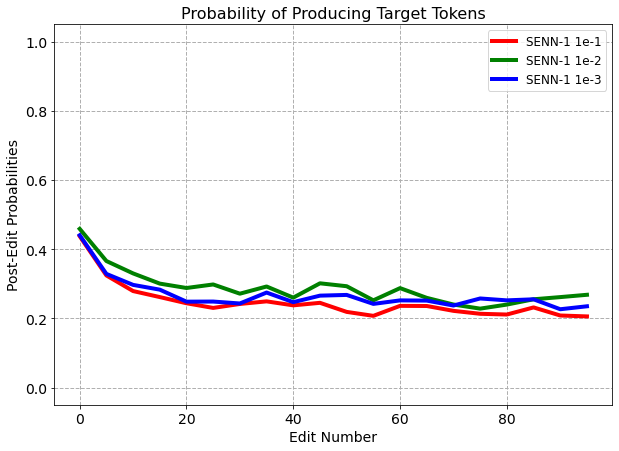

In [13]:
""" Testing effects of inner-loop learning rate on post-edit probabilities """

# 1e-1
senn1_1['grouping'] = (
    senn1_1
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
ax = (
    senn1_1
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN-1 1e-1"
    )
)

# 1e-2
senn1_2['grouping'] = (
    senn1_2
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    senn1_2
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="green",
        label="SENN-1 1e-2", ax=ax
    )
)

# 1e-3
senn1_3['grouping'] = (
    senn1_3
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    senn1_3
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="blue",
        label="SENN-1 1e-3", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)


In [14]:

enn['grouping'] = (
    enn
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
ax = (
    enn
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        figsize=(10,7), linewidth=4, color="yellow",
        label="Editable ResNet-18"
    )
)

'''
senn20['grouping'] = (
    senn20
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn20
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index(drop=True)
    .plot(
        kind='line', x='grouping', y="edit_success", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN-20", ax=ax
    )
)

senn5['grouping'] = (
    senn5
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn5
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        figsize=(10,7), linewidth=4, color="blue",
        label="SENN-5", ax=ax
    )
)
'''

senn1['grouping'] = (
    senn1
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    senn1
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        figsize=(10,7), linewidth=4, color="green",
        label="SENN-1", ax=ax
    )
)

'''
ortho5['grouping'] = (
    ortho5
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    ortho5
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        figsize=(10,7), linewidth=4, color="purple",
        label="SENN-5 Ortho", ax=ax
    )
)


ortho1['grouping'] = (
    ortho1
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    ortho1
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        figsize=(10,7), linewidth=4, color="teal",
        label="SENN-1 Ortho", ax=ax
    )
)

'''

base['grouping'] = (
    base
    .edit_number
    .apply(lambda x: int(x / 5) * 5)
)
(
    base
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="edit_success", 
        color='orange', figsize=(10,7), linewidth=4,
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Edit success", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)


KeyError: 'edit_success'

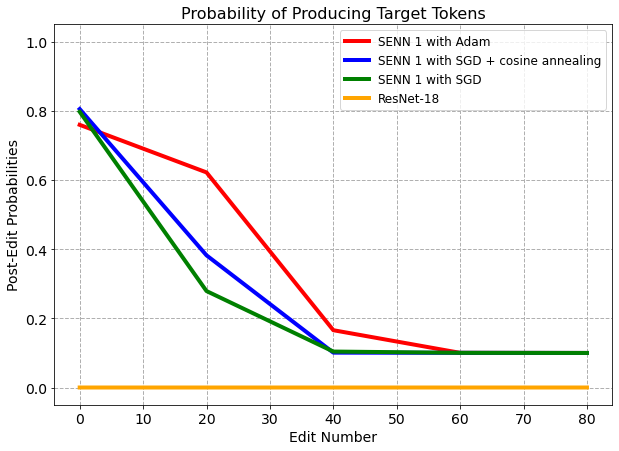

In [20]:
"""Comparison of different learning rate optimizer algorithms"""

senn_adam['grouping'] = (
    senn_adam
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax = (
    senn_adam
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 with Adam"
    )
)

senn_cos['grouping'] = (
    senn_cos
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn_cos
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='blue', figsize=(10,7), linewidth=4,
        label="SENN 1 with SGD + cosine annealing", ax=ax
    )
)

senn_sgd['grouping'] = (
    senn_sgd
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn_sgd
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='green', figsize=(10,7), linewidth=4,
        label="SENN-1 with SGD", ax=ax
    )
)

base['grouping'] = (
    base
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    base
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='orange', figsize=(10,7), linewidth=4,
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)


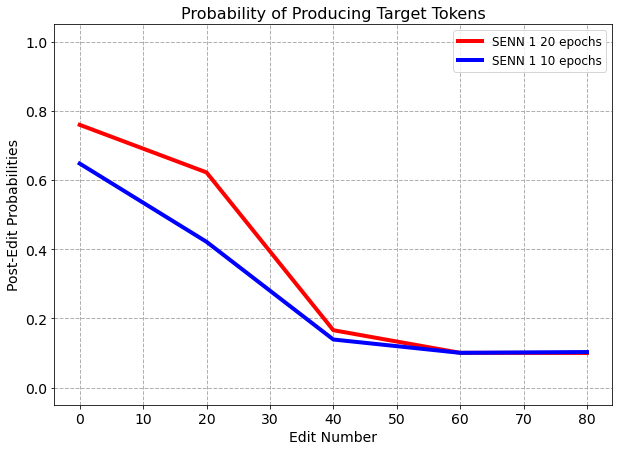

In [23]:
"""Analysis of effects of training time for SENN"""

senn_adam_20 = pd.read_csv("../src/outputs/2021-05-18/12-02-44/eval/edit_success_finetune_epoch19_ts9999.2021-05-18.12-02-44")
senn_adam_10 = pd.read_csv("../src/outputs/2021-05-18/12-02-44/eval/edit_success_resnet18_epoch9_ts1800.2021-05-18.12-02-44")

senn_adam_20['grouping'] = (
    senn_adam_20
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax = (
    senn_adam_20
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 20 epochs"
    )
)

senn_adam_10['grouping'] = (
    senn_adam_10
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn_adam_10
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='blue', figsize=(10,7), linewidth=4,
        label="SENN 1 10 epochs", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)


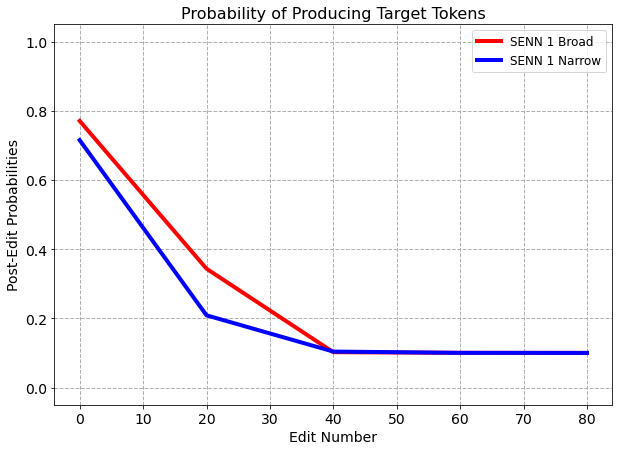

In [26]:
"""Analysis of effects broadening edit data distribution for SENN"""

senn_sgd_broad = pd.read_csv("../src/outputs/2021-05-18/11-56-08/eval/edit_success_resnet18_epoch5_ts1000.2021-05-18.11-56-08")
senn_sgd_narrow = pd.read_csv("../src/outputs/2021-05-18/10-46-22/eval/edit_success_finetune_epoch4_ts9999.2021-05-18.10-46-22")

senn_sgd_broad['grouping'] = (
    senn_sgd_broad
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax = (
    senn_sgd_broad
    .query('edit_step == n_edit_steps')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 Broad"
    )
)

senn_sgd_narrow['grouping'] = (
    senn_sgd_narrow
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    senn_sgd_narrow
    .query('edit_step == n_edit_steps')
    .query('edit_number < 100')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(x))
    .reset_index()
    .plot(
        kind='line', x="grouping",y="log_prob", 
        color='blue', figsize=(10,7), linewidth=4,
        label="SENN 1 Narrow", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-0.05, 1.05)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")


## Accuracy

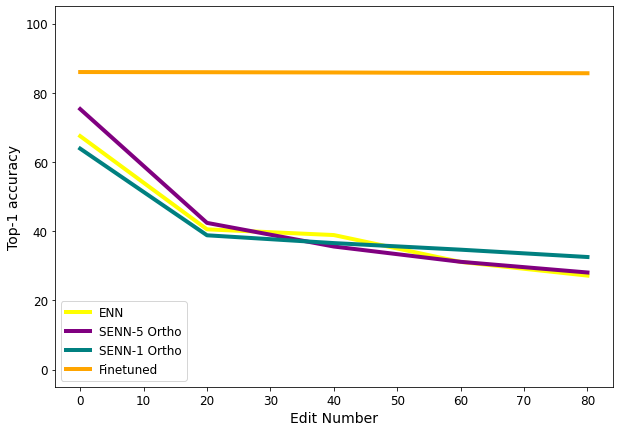

In [22]:

ax = (
   enn.loc[~enn.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, color="yellow",
        label="ENN"
    )
)

'''
(
    senn20.loc[~senn20.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='red', linewidth=4,
        label='SENN 20', ax=ax
    )
)

(
    senn5.loc[~senn5.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='black', linewidth=4,
        label='SENN 5', ax=ax
    )
)

(
    senn1.loc[~senn1.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='green', linewidth=4,
        label='SENN-1', ax=ax
    )
)
'''

(
    ortho5.loc[~ortho5.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='purple', linewidth=4, 
        label='SENN-5 Ortho', ax=ax
    )
)

(
    ortho1.loc[~ortho1.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        figsize=(10,7), color='teal', linewidth=4, 
        label='SENN-1 Ortho', ax=ax
    )
)



(
    base.loc[~base.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='orange', linewidth=4, 
        label='Finetuned', ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc1.png', bbox_inches='tight', facecolor="#ffffff")

<AxesSubplot:xlabel='edit_number'>

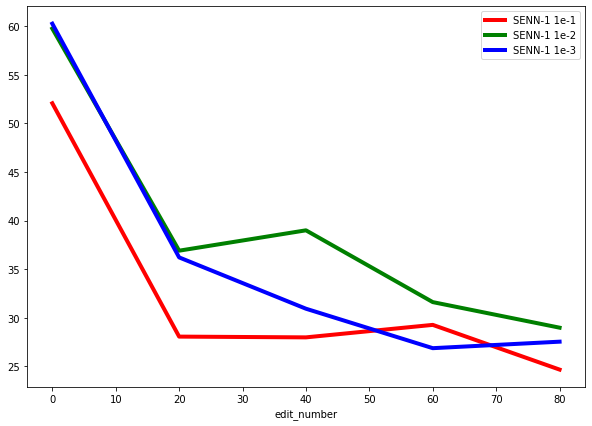

In [14]:
ax = (
   senn1_1.loc[~senn1_1.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN-1 1e-1"
    )
)

(
    senn1_2.loc[~senn1_2.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        figsize=(10,7), color='green', linewidth=4, 
        label='SENN-1 1e-2', ax=ax
    )
)

(
    senn1_3.loc[~senn1_3.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        figsize=(10,7), color='blue', linewidth=4, 
        label='SENN-1 1e-3', ax=ax
    )
)


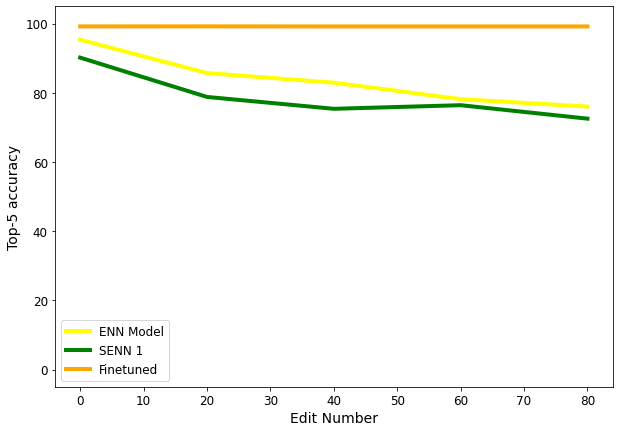

In [20]:
ax = (
   enn.loc[~enn.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5", 
        figsize=(10,7), linewidth=4, color="yellow",
        label="ENN Model"
    )
)

'''
(
    senn20.loc[~senn20.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5",
        color='red', linewidth=4,
        label='SENN 20', ax=ax
    )
)

(
    senn5.loc[~senn5.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5",
        color='green', linewidth=4,
        label='SENN 5', ax=ax
    )
)
'''

(
    senn1.loc[~senn1.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5",
        color='green', linewidth=4,
        label='SENN 1', ax=ax
    )
)

(
    base.loc[~base.new_acc5.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='line', x="edit_number",y="new_acc5",
        color='orange', linewidth=4,
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-5 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc5.png', bbox_inches='tight', facecolor="#ffffff")

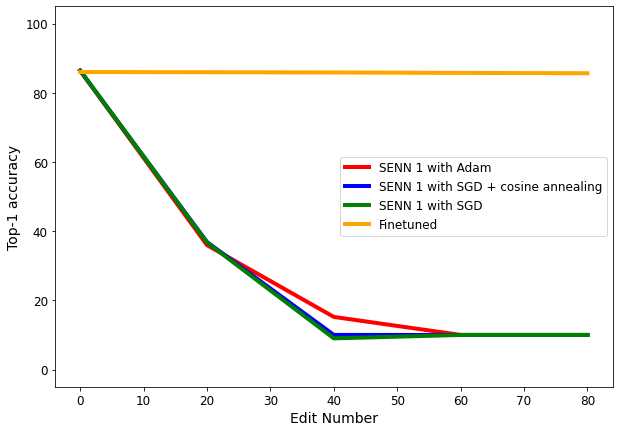

In [22]:
"""Comparison of different learning rate optimizer algorithms"""

ax = (
   senn_adam.loc[~senn_adam.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 with Adam"
    )
)

(
    senn_cos.loc[~senn_cos.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='blue', linewidth=4,
        label='SENN 1 with SGD + cosine annealing', ax=ax
    )
)

(
    senn_sgd.loc[~senn_sgd.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='green', linewidth=4,
        label='SENN 1 with SGD', ax=ax
    )
)

(
    base.loc[~base.new_acc1.isna()]
    .query('edit_number < 100')
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='orange', linewidth=4, 
        label='Finetuned', ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc1.png', bbox_inches='tight', facecolor="#ffffff")


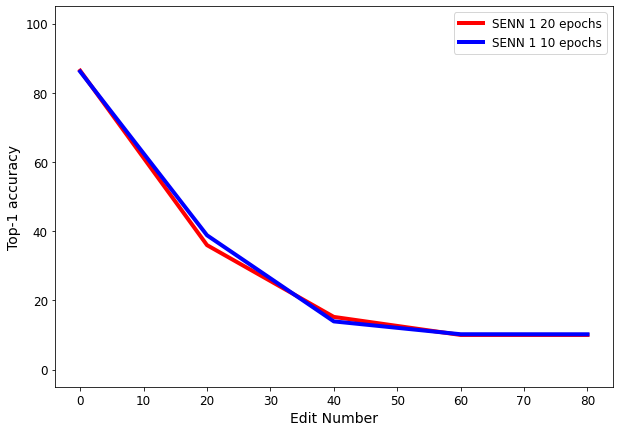

In [24]:
"""Comparison of different learning rate optimizer algorithms"""

ax = (
   senn_adam_20.loc[~senn_adam_20.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 20 epochs"
    )
)

(
    senn_adam_10.loc[~senn_adam_10.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='blue', linewidth=4,
        label='SENN 1 10 epochs', ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc1.png', bbox_inches='tight', facecolor="#ffffff")


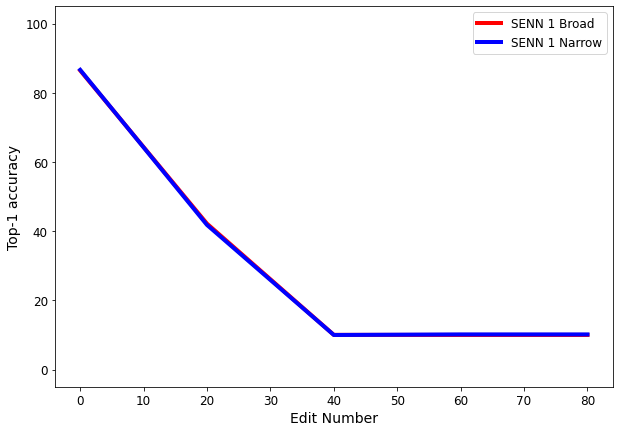

In [29]:
"""Analysis of effects broadening edit data distribution for SENN"""

ax = (
   senn_sgd_broad.loc[~senn_sgd_broad.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1", 
        figsize=(10,7), linewidth=4, color="red",
        label="SENN 1 Broad"
    )
)

(
    senn_sgd_narrow.loc[~senn_sgd_narrow.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='line', x="edit_number", y="new_acc1",
        color='blue', linewidth=4,
        label='SENN 1 Narrow', ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.ylim(-5, 105)
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('cifar_resnet_acc1.png', bbox_inches='tight', facecolor="#ffffff")



## L2 distance

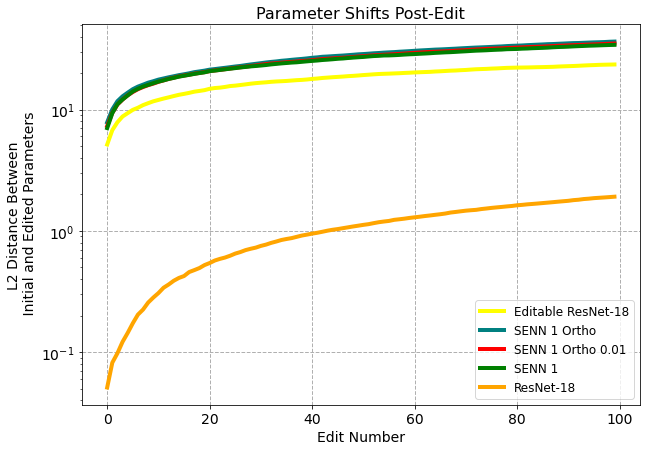

In [6]:
(
    enn
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="Editable ResNet-18", figsize=(10,7), linewidth=4, color="yellow")
)

'''
(
    senn20
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color="red", label="SENN 20", linewidth=4)
)

(
    senn5
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color="green", label="SENN 5", linewidth=4)
)
'''

(
    ortho1
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color="teal", label="SENN 1 Ortho", linewidth=4)
)

(
    ortho1_alt
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color="red", label="SENN 1 Ortho 0.01", linewidth=4)
)



(
    senn1
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color="green", label="SENN 1", linewidth=4)
)

(
    base
    .query('edit_number < 100')
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="ResNet-18", linewidth=4)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("L2 Distance Between\n Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.title("Parameter Shifts Post-Edit", fontsize=16)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")

# ImageNet

## Edit success

In [26]:
# ImageNet
model_100 = pd.read_csv("../eval/edit_success_20210506.13.05.1620331667_resnet18_pretrained")
gpt_100 = pd.read_csv("../eval/edit_success_20210506.19.05.1620353686_resnet18_epoch1_ts20000.20210504.00.05.1620113071")

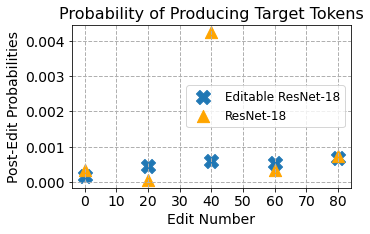

In [27]:
model_100['grouping'] = (
    model_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
ax=(
    model_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        marker="X", s=200, figsize=(10,7),
        label="Editable ResNet-18"
    )
)


gpt_100['grouping'] = (
    gpt_100
    .edit_number
    .apply(lambda x: int(x /20) * 20)
)
(
    gpt_100
    .query('edit_step == 1')
    .groupby("grouping")
    .log_prob
    .apply(lambda x: np.mean(np.exp(x)))
    .reset_index()
    .plot(
        kind='scatter', x="grouping",y="log_prob", 
        color='orange', marker="^", s=150, figsize=(5,3),
        label="ResNet-18", ax=ax
    )
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("Post-Edit Probabilities", fontsize=14)
plt.yticks(fontsize=14)
# plt.ylim(-0.01,0.16)
plt.title("Probability of Producing Target Tokens", fontsize=16)
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.savefig('edit_success.png', bbox_inches='tight', facecolor="#ffffff")

## Accuracy

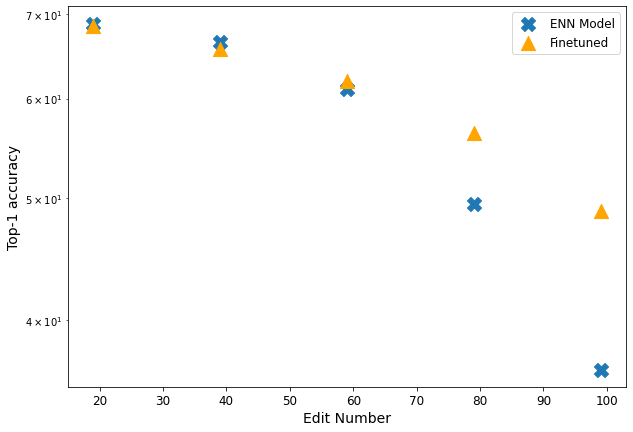

In [28]:
ax = (
   model_100.loc[~model_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc1.isna()]
    .groupby("edit_number")
    .new_acc1.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc1"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc1",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-1 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

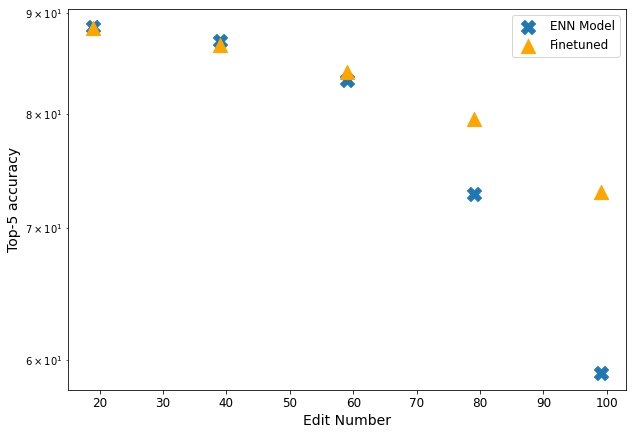

In [29]:
ax = (
   model_100.loc[~model_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5", 
        marker="X", s=200, figsize=(10,7),
        label="ENN Model"
    )
)

(
    gpt_100.loc[~gpt_100.new_acc5.isna()]
    .groupby("edit_number")
    .new_acc5.mean()
    .reset_index()
    .loc[:,["edit_number","new_acc5"]]
    .plot(
        kind='scatter', x="edit_number",y="new_acc5",
        color='orange', marker="^", s=200, 
        label='Finetuned', ax=ax
    )
)
plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Top-5 accuracy", fontsize=14)
plt.yticks(fontsize=12)
plt.yscale("log")
plt.title("", fontsize=16)
plt.legend(fontsize=12)
plt.savefig('perplexity.png', bbox_inches='tight', facecolor="#ffffff")

## L2 distance

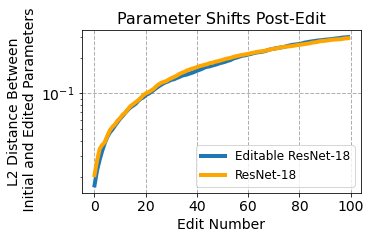

In [30]:
(
    model_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(label="Editable ResNet-18", figsize=(5,3), linewidth=4)
)


(
    gpt_100
    .query('edit_step == 1')
    .groupby("edit_number")
    .norm.mean()
    .plot(color='orange', label="ResNet-18", linewidth=4)
)

plt.xlabel("Edit Number", fontsize=14)
plt.xticks(fontsize=14)
plt.ylabel("L2 Distance Between\n Initial and Edited Parameters", fontsize=14)
plt.yticks(fontsize=14)
plt.yscale("log")
plt.legend(fontsize=12)
plt.grid(linestyle='--', linewidth=1)
plt.title("Parameter Shifts Post-Edit", fontsize=16)
plt.savefig('l2_distance.png', bbox_inches='tight', facecolor="#ffffff")